# Download Dataset

In [0]:
# Get dataset. It's is too big to come as a single file
!wget -O "./GSE87571_Matrix_Avg_Beta.txt.gz" "https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE87571&format=file&file=GSE87571%5Fmatrix1of2%2Etxt%2Egz"
!wget -O "./GSE87571_Matrix_Avg_Beta2.txt.gz" "https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE87571&format=file&file=GSE87571%5Fmatrix2of2%2Etxt%2Egz"


--2020-03-06 04:54:58--  https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE87571&format=file&file=GSE87571%5Fmatrix1of2%2Etxt%2Egz
Resolving www.ncbi.nlm.nih.gov (www.ncbi.nlm.nih.gov)... 130.14.29.110, 2607:f220:41e:4290::110
Connecting to www.ncbi.nlm.nih.gov (www.ncbi.nlm.nih.gov)|130.14.29.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1465794128 (1.4G) [application/octet-stream]
Saving to: ‘./GSE87571_Matrix_Avg_Beta.txt.gz’

./GSE87571_Matrix_A 100%[===================>]   1.36G  24.6MB/s    in 69s     

2020-03-06 04:56:08 (20.3 MB/s) - ‘./GSE87571_Matrix_Avg_Beta.txt.gz’ saved [1465794128/1465794128]

--2020-03-06 04:56:08--  https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE87571&format=file&file=GSE87571%5Fmatrix2of2%2Etxt%2Egz
Resolving www.ncbi.nlm.nih.gov (www.ncbi.nlm.nih.gov)... 130.14.29.110, 2607:f220:41e:4290::110
Connecting to www.ncbi.nlm.nih.gov (www.ncbi.nlm.nih.gov)|130.14.29.110|:443... connected.
HTTP request sent, awaiting respon

In [0]:
# Extract dataset
!gunzip "./GSE87571_Matrix_Avg_Beta.txt.gz"
!gunzip "./GSE87571_Matrix_Avg_Beta2.txt.gz"


In [0]:
# Merge data set files into one
!cut -d$'\t' -f1 --complement "./GSE87571_Matrix_Avg_Beta2.txt" > newFile && mv newFile "./GSE87571_Matrix_Avg_Beta2.txt"
!paste "GSE87571_Matrix_Avg_Beta.txt" "./GSE87571_Matrix_Avg_Beta2.txt" > matrix.csv

# Remove every other column because every other column has blank values
!awk '{{printf "%s ", $1}for(i=2;i<=NF;i=i+2){printf "%s ", $i}{printf "%s", RS}}' matrix.csv > final_matrix.csv

In [0]:
# Get a sneak peak of the final output
!head -5 final_matrix.csv

ID_REF	X1	X1.1	X10	X10.1	X100	X100.1	X101	X101.1	X102	X102.1	X103	X103.1	X104	X104.1	X105	X105.1	X106	X106.1	X107	X107.1	X108	X108.1	X109	X109.1	X11	X11.1	X110	X110.1	X111	X111.1	X112	X112.1	X113	X113.1	X114	X114.1	X115	X115.1	X116	X116.1	X117	X117.1	X118	X118.1	X119	X119.1	X12	X12.1	X120	X120.1	X121	X121.1	X122	X122.1	X123	X123.1	X124	X124.1	X125	X125.1	X126	X126.1	X127	X127.1	X128	X128.1	X129	X129.1	X13	X13.1	X130	X130.1	X131	X131.1	X132	X132.1	X133	X133.1	X134	X134.1	X135	X135.1	X136	X136.1	X137	X137.1	X138	X138.1	X139	X139.1	X14	X14.1	X140	X140.1	X141	X141.1	X142	X142.1	X143	X143.1	X144	X144.1	X145	X145.1	X146	X146.1	X147	X147.1	X148	X148.1	X149	X149.1	X15	X15.1	X150	X150.1	X151	X151.1	X152	X152.1	X153	X153.1	X154	X154.1	X155	X155.1	X156	X156.1	X157	X157.1	X158	X158.1	X159	X159.1	X16	X16.1	X160	X160.1	X161	X161.1	X162	X162.1	X163	X163.1	X164	X164.1	X165	X165.1	X166	X166.1	X167	X167.1	X168	X168.1	X169	X169.1	X17	X17.1	X170	X170.1	X171	X171.1	X172	X172.1	X173	X173.1	X174	X174.1	X175	

# Imports

In [0]:
# Import necessary libraries

import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt # NOTE: This was tested with matplotlib v. 2.1.0
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

# import tensorflow

from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

TensorFlow 2.x selected.


# Preprocessing

In [0]:
# Read data from txt file into dataframe
data = pd.read_csv("./final_matrix.csv", sep=' ', low_memory=False, index_col = 0)
data.drop("Unnamed: 733", inplace=True, axis=1)

In [0]:
# Add annotations from annotation file.
data_annotated = data.T

# read annotations
annotations = pd.read_csv("GSE87571_series_matrix.csv", index_col=0, header=None).T

for i, title in enumerate(annotations["Column_Name"]):
  annotations["Column_Name"][i + 1] = title[:title.index(" ")]

# Set index and remove unnecessary rows
annotations.set_index("Column_Name", inplace=True)
annotations.drop(["Tissue", "Disease"], axis=1, inplace=True)

# Format cells into float-ready strings
annotations['Gender'] = annotations['Gender'].str.replace('gender: ','')
annotations['Age'] = (annotations['Age'].str.replace('age: ',''))

# sort and merge
annotations.sort_index(inplace=True)
data_annotated.sort_index(inplace=True)
data_annotated = data_annotated.astype(float)
data_annotated["Age"] = annotations["Age"]

# dropna and set float
data_annotated.dropna(axis=1, inplace=True)
data_annotated = data_annotated[data_annotated.Age != "NA"]
data_annotated.Age = data_annotated.Age.astype(float)
print(data_annotated.shape)
print(data_annotated.head())

ID_REF  cg00050873  cg00212031  ...  ch.22.47579720R  ch.22.48274842R
X1        0.824023    0.031579  ...         0.083398         0.028080
X10            NaN         NaN  ...         0.112058         0.035582
X100           NaN         NaN  ...         0.070752         0.023578
X101           NaN         NaN  ...         0.095896         0.025565
X102           NaN         NaN  ...         0.056537         0.031796
...            ...         ...  ...              ...              ...
X95       0.829739    0.072655  ...         0.080128         0.034908
X96            NaN         NaN  ...         0.072277         0.028587
X97       0.832990    0.066660  ...         0.070170         0.031882
X98            NaN         NaN  ...         0.091591         0.032754
X99       0.852145    0.045496  ...         0.086221         0.033597

[732 rows x 485512 columns]
0                     Sample_title  ...                Disease
1  X1 genomic DNA from whole blood  ...  disease state: normal
2  X2

In [0]:
# Split data
train_annotated, test_annotated = train_test_split(data_annotated, test_size=0.10)

In [0]:
# Calculate correlation matrix
corr_array = []
for col in train_annotated.columns:
  corr_array.append(train_annotated[col].corr(train_annotated["Age"]))

print(len(corr_array))
corr_df = pd.DataFrame(corr_array, columns=["Correlation"], index=train_annotated.columns)

corr_df["Abs_Corr"] = corr_df.Correlation.abs()
corr_df.sort_values("Abs_Corr", inplace=True, ascending=False)
print(corr_df.head(26))
corr_df.to_csv("corr.csv")

450204
            Correlation  Abs_Corr
ID_REF                           
Age            1.000000  1.000000
cg16867657     0.946976  0.946976
cg06639320     0.921328  0.921328
cg22454769     0.919883  0.919883
cg21572722     0.900791  0.900791
cg24079702     0.884546  0.884546
cg14361627     0.869089  0.869089
cg24724428     0.866792  0.866792
cg19283806    -0.866709  0.866709
cg07553761     0.863394  0.863394
cg11649376    -0.858891  0.858891
cg23500537     0.851587  0.851587
cg16008966    -0.848752  0.848752
cg08128734    -0.848669  0.848669
cg00329615    -0.847313  0.847313
cg04875128     0.847068  0.847068
cg26290632     0.845511  0.845511
cg07082267    -0.843203  0.843203
cg07547549     0.842530  0.842530
cg08262002    -0.842335  0.842335
cg17110586     0.837722  0.837722
cg25410668     0.835403  0.835403
cg00481951     0.833812  0.833812
cg14556683     0.833250  0.833250
cg16054275    -0.832821  0.832821
cg01528542    -0.830386  0.830386


In [0]:
# Transpose train_annotated and train_annotated
train_annotated = train_annotated.T
test_annotated = test_annotated.T

In [0]:
# Filter features by those with highest correlations in the training set

spots_select = corr_df.index[1:26].to_list()

train_processed = (train_annotated[train_annotated.index.isin(spots_select)]).T
test_processed = (test_annotated[test_annotated.index.isin(spots_select)]).T

print(train_processed)

ID_REF  cg22454769  cg24079702  cg07553761  ...  cg07082267  cg17110586  cg07547549
X583      0.449788    0.296135    0.286308  ...    0.505032    0.324570    0.406563
X188      0.681501    0.528452    0.354213  ...    0.362095    0.391024    0.543736
X699      0.414886    0.250148    0.192940  ...    0.494466    0.293920    0.379763
X662      0.563281    0.354979    0.305151  ...    0.400139    0.389350    0.493239
X214      0.632505    0.460142    0.341979  ...    0.324196    0.382735    0.576079
...            ...         ...         ...  ...         ...         ...         ...
X447      0.388161    0.259299    0.246475  ...    0.454470    0.301472    0.396273
X228      0.551614    0.354026    0.314982  ...    0.357901    0.362747    0.505964
X503      0.696232    0.505705    0.386362  ...    0.327986    0.455464    0.476864
X320      0.681475    0.481986    0.492108  ...    0.373529    0.462440    0.636429
X371      0.288452    0.195598    0.160535  ...    0.569085    0.208316    0

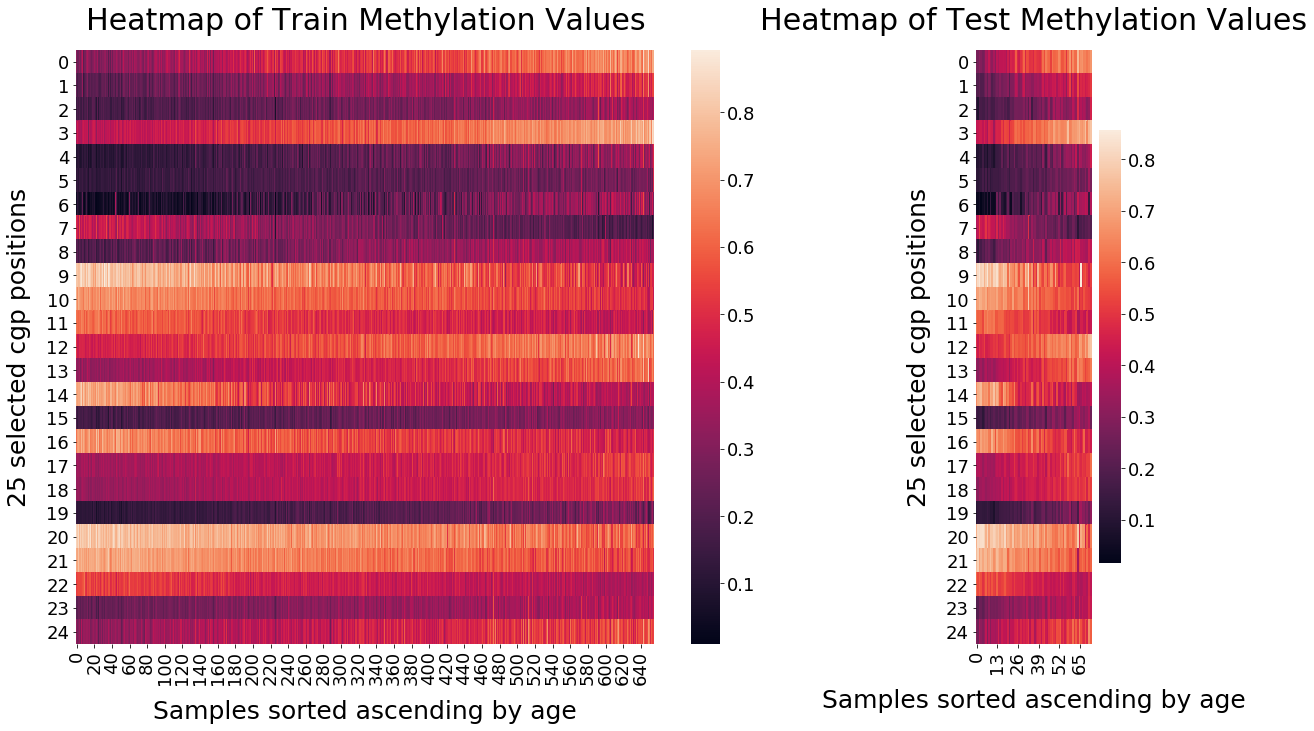

In [0]:
# Visualize features in heatmap

# Sort features ascending by age in training and testing sets

train_processed = train_processed.assign(Age = train_annotated.T.Age)
train_processed = train_processed.sort_values("Age")
train_processed = train_processed.dropna(axis=0, how='any')

train_processed_ages = train_processed["Age"]
train_processed.drop("Age", inplace=True, axis=1)
train_processed_np = train_processed.to_numpy()
np.save("train_processed_features.npy", train_processed_np)
np.save("train_processed_target.npy", train_processed_ages)

test_processed = test_processed.assign(Age = test_annotated.T.Age)
test_processed = test_processed.sort_values("Age")
test_processed = test_processed.dropna(axis=0, how='any')

test_processed_ages = test_processed["Age"]
test_processed.drop("Age", inplace=True, axis=1)
test_processed_np = test_processed.to_numpy()
np.save("test_processed_features.npy", test_processed_np)
np.save("test_processed_target.npy", test_processed_ages)
 
# Print heatmaps
SMALL_SIZE = 18
MEDIUM_SIZE = 25
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


fig, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [5, 1]})
fig.set_size_inches(18.5, 10.5, forward=True)

train_processed_np = np.load('X_train.npy')
test_processed_np = np.load('X_test.npy')

sns.heatmap(train_processed_np.T, annot=False, ax = a0)
a0.set_title('Heatmap of Train Methylation Values', pad=20)
a0.set_xlabel("Samples sorted ascending by age", labelpad=15)
a0.set_ylabel("25 selected cgp positions", labelpad=15)

sns.heatmap(test_processed_np.T, annot=False, ax = a1)
a1.set_title('Heatmap of Test Methylation Values', pad=20)
a1.set_xlabel("Samples sorted ascending by age", labelpad=15)
a1.set_ylabel("25 selected cgp positions", labelpad=15)

fig.tight_layout()
fig.savefig('train_test_heatmap25.jpg', dpi=100)


# The easy part: Keras

In [0]:
# Basic neural net with 4 dense layers
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1024, activation='relu', input_shape=(25,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

# Conv model
model_conv = tf.keras.models.Sequential([
  tf.keras.layers.Reshape((4, 4, 1), input_shape=(16,)),
  tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu',padding='same'),
  tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu',padding='same'),
  #tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  # tf.keras.layers.Dense(256, activation='relu'),
  # tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  #tf.keras.layers.Dense(2, activation='softmax')
  tf.keras.layers.Dense(1)
])

# Let me know if you are able to produce a better model!

model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model.summary()
model.fit(train_processed_np, train_processed_ages,  epochs=50, validation_data=(test_processed_np, test_processed_ages))


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1024)              26624     
_________________________________________________________________
dropout_9 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_10 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_11 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                

# Analysis of Results

Tests for Plus or Minus 10 Years
Machine Learning:
Age    1.0
dtype: float64
Guess Mean:
Age    0.315068
dtype: float64
Guess Random Between 15 and 100:
Age    0.260274
dtype: float64
Tests for Plus or Minus 5 Years
Machine Learning:
Age    0.767123
dtype: float64
Guess Mean:
Age    0.164384
dtype: float64
Guess Random Between 15 and 100:
Age    0.109589
dtype: float64


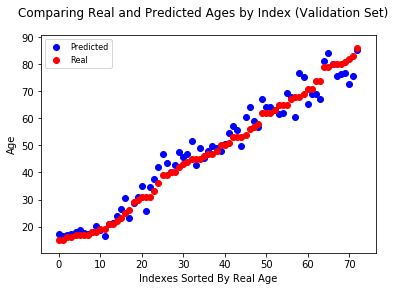

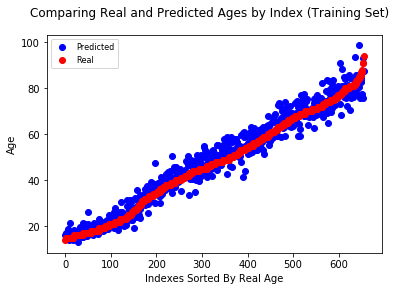

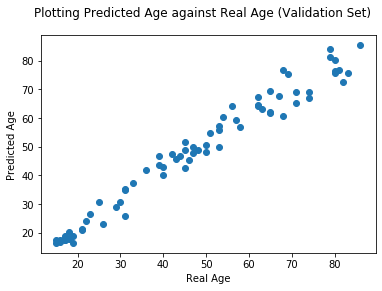

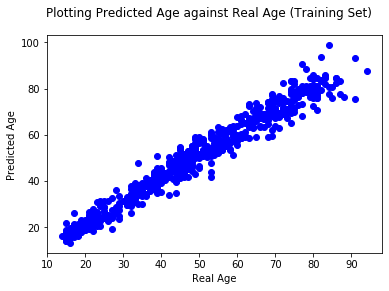

In [0]:
# for generating submission
X_test = test_processed_np
X_train = train_processed_np
y_test = test_processed_ages
y_train = train_processed_ages

np.save("X_test.npy", X_test)
np.save("X_train.npy", X_train)
y = model.predict(X_test)
y_ = model.predict(X_train)


dfd = abs(y[:, 0] - y_test)
dfc = abs(y_test.mean() - y_test)

random_array = np.random.randint(15, high=100, size=(73))
dfr = abs(random_array - y_test)

print("Tests for Plus or Minus 10 Years")
dfsum = pd.DataFrame(dfd < 10)
dfcsum = pd.DataFrame(dfc < 10)
dfrsum = pd.DataFrame(dfr < 10)

print("Machine Learning:")
print(dfsum.sum() / len(dfsum))
print("Guess Mean:")
print(dfcsum.sum() / len(dfcsum))
print("Guess Random Between 15 and 100:")
print(dfrsum.sum() / len(dfrsum))

print("Tests for Plus or Minus 5 Years")
dfsum = pd.DataFrame(dfd < 5)
dfcsum = pd.DataFrame(dfc < 5)
dfrsum = pd.DataFrame(dfr < 5)
print("Machine Learning:")
print(dfsum.sum() / len(dfsum))
print("Guess Mean:")
print(dfcsum.sum() / len(dfcsum))
print("Guess Random Between 15 and 100:")
print(dfrsum.sum() / len(dfrsum))



##  Comparing Real and Predicted Ages by Index (Validation Set)
df = pd.DataFrame({"Real":y_test, "Pred":y.reshape(73)})
df = df.sort_values(by=['Real'])
pr = plt.scatter(x = range(73), y = df.Pred, c = 'b')
re = plt.scatter(x = range(73), y = df.Real, c = 'r')
plt.xlabel('Indexes Sorted By Real Age')
plt.ylabel('Age')
plt.suptitle('Comparing Real and Predicted Ages by Index (Validation Set)')

plt.legend((pr, re),
  ('Predicted', 'Real'),
  scatterpoints=1,
  loc='upper left',
  ncol=1,
  fontsize=8)

plt.savefig('Comparing Real and Predicted Ages by Index (Validation Set)')
plt.show()

## Comparing Real and Predicted Ages by Index (Training Set)
df = pd.DataFrame({"Real":y_train, "Pred":y_.reshape(656)})
df = df.sort_values(by=['Real'])
pr = plt.scatter(x = range(656), y = df.Pred, c = 'b')
re = plt.scatter(x = range(656), y = df.Real, c = 'r')
plt.xlabel('Indexes Sorted By Real Age')
plt.ylabel('Age')
plt.suptitle('Comparing Real and Predicted Ages by Index (Training Set)')

plt.legend((pr, re),
  ('Predicted', 'Real'),
  scatterpoints=1,
  loc='upper left',
  ncol=1,
  fontsize=8)

plt.savefig('Comparing Real and Predicted Ages by Index (Training Set)')
plt.show()


## Plotting Predicted Age against Real Age (Validation Set)
plt.scatter(x=y_test, y=y.reshape(73))
np.save("y_valid_real.npy", y_test)
np.save("y_valid_pred.npy", y.reshape(73))

plt.xlabel('Real Age')
plt.ylabel('Predicted Age')
plt.suptitle('Plotting Predicted Age against Real Age (Validation Set)')

plt.savefig('Plotting Predicted Age against Real Age (Validation Set)')
plt.show()


## Plotting Predicted Age against Real Age (Training Set)
plt.scatter(x=y_train, y=y_.reshape(656), c='b')

plt.xlabel('Real Age')
plt.ylabel('Predicted Age')
plt.suptitle('Plotting Predicted Age against Real Age (Training Set)')

plt.savefig('Plotting Predicted Age against Real Age (Training Set)')
plt.show()

In [0]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from scipy import stats

y_true = test_processed_ages
y_pred = y.flatten()
print("Mean Absolute Error: " + str(mean_absolute_error(y_true, y_pred)))
print("Standard Error: " + str(stats.sem(y_true - y_pred)))
print("Standard Deviation: " + str(np.std(y_true - y_pred)))

Mean Absolute Error: 3.1956959815874493
Standard Error: 0.45657937545364086
Standard Deviation: 3.8742044703982574


# Saving the model for production use

In [0]:
!pip install tensorflowjs 

In [0]:
# Save model
model.save("keras.h5")

In [0]:
!mkdir -p model
!tensorflowjs_converter --input_format keras keras.h5 model/

In [0]:
!zip -r model.zip model 

updating: model/ (stored 0%)
  adding: model/group1-shard2of3.bin (deflated 8%)
  adding: model/group1-shard3of3.bin (deflated 8%)
  adding: model/group1-shard1of3.bin (deflated 8%)
  adding: model/model.json (deflated 80%)


In [0]:
!zip "$(date +%F-%M)figures.zip" X_test.npy X_train.npy train_processed_features.npy train_processed_target.npy test_processed_features.npy test_processed_target.npy train_test_heatmap25.jpg y_valid_pred.npy y_valid_real.npy "Comparing Real and Predicted Ages by Index (Training Set).png" 'Plotting Predicted Age against Real Age (Training Set).png' "Plotting Predicted Age against Real Age (Validation Set).png" "Comparing Real and Predicted Ages by Index (Validation Set).png" "Comparing Real and Predicted Ages by Index (Validation Set).png" keras.h5
np.save("train_processed_features.npy", train_processed_np)
np.save("train_processed_target.npy", train_processed_ages)

test_processed = test_processed.assign(Age = test_annotated.T.Age)
test_processed = test_processed.sort_values("Age")
test_processed = test_processed.dropna(axis=0, how='any')

test_processed_ages = test_processed["Age"]
test_processed.drop("Age", inplace=True, axis=1)
test_processed_np = test_processed.to_numpy()
np.save("test_processed_features.npy", test_processed_np)
np.save("test_processed_target.npy", test_processed_ages)

  adding: X_test.npy (deflated 6%)
  adding: X_train.npy (deflated 6%)
  adding: train_processed_features.npy (deflated 44%)
  adding: train_processed_target.npy (deflated 47%)
  adding: test_processed_features.npy (deflated 45%)
  adding: test_processed_target.npy (deflated 47%)
  adding: train_test_heatmap25.jpg (deflated 11%)
  adding: y_valid_pred.npy (deflated 11%)
  adding: y_valid_real.npy (deflated 74%)
  adding: Comparing Real and Predicted Ages by Index (Training Set).png (deflated 4%)
  adding: Plotting Predicted Age against Real Age (Training Set).png (deflated 5%)
  adding: Plotting Predicted Age against Real Age (Validation Set).png (deflated 8%)
  adding: Comparing Real and Predicted Ages by Index (Validation Set).png (deflated 6%)
  adding: keras.h5 (deflated 33%)


In [0]:
!tar -cvzf all_data.tar.gz final_matrix.csv

final_matrix.csv
